**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 2

Se importara la base de datos procesada del ejercico anterior.

# Grupo 7


Integrantes del grupo:


Adrian Kozameh

Nicolas Da Via

Francisco RUa

Diana Carolina Insaurralde

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'https://raw.githubusercontent.com/Francisco-Rua/Data-Science-2022/main/Entregable%202%20-%20Analisis%20Exploratorio%20y%20Curacion%20de%20Datos/merged_sales_df_tp1.csv')
melb_df

,Suburb,Rooms,Type,Price,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_record_count,airbnb_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,258.0,130.624031
1,Abbotsford,2,h,1035000.0,3067.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,258.0,130.624031
2,Abbotsford,3,h,1465000.0,3067.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,258.0,130.624031
3,Abbotsford,3,h,850000.0,3067.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,258.0,130.624031
4,Abbotsford,2,h,941000.0,3067.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,3067.0,258.0,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,Westmeadows,3,h,582000.0,3049.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,3049.0,21.0,92.285714
11037,Wheelers Hill,4,h,1245000.0,3150.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,189.0,124.026455
11038,Williamstown,3,h,1031000.0,3016.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,3016.0,74.0,191.094595
11039,Williamstown,3,h,1170000.0,3016.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,3016.0,74.0,191.094595


In [ ]:
melb_df.isna().sum()


Suburb                    0
Rooms                     0
Type                      0
Price                     0
Postcode                  0
Landsize                  0
BuildingArea           5273
YearBuilt              4363
CouncilArea            1058
Lattitude                 0
Longtitude                0
Regionname                0
zipcode                1381
airbnb_record_count    1381
airbnb_price_mean      1381
dtype: int64

Se eliminan filas con valores en 0 de la variable Councilarea

In [ ]:
melb_df = melb_df.dropna(subset=["CouncilArea"])

In [ ]:
melb_df

,Suburb,Rooms,Type,Price,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_record_count,airbnb_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,258.0,130.624031
1,Abbotsford,2,h,1035000.0,3067.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,258.0,130.624031
2,Abbotsford,3,h,1465000.0,3067.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,258.0,130.624031
3,Abbotsford,3,h,850000.0,3067.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,258.0,130.624031
4,Abbotsford,2,h,941000.0,3067.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,3067.0,258.0,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Williamstown,1,u,385000.0,3016.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,3016.0,74.0,191.094595
9981,Williamstown,3,h,1285000.0,3016.0,296.0,NaN,NaN,Hobsons Bay,-37.86335,144.89487,Western Metropolitan,3016.0,74.0,191.094595
9982,Windsor,2,u,560000.0,3181.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,3181.0,460.0,148.169565
9983,Wollert,3,h,525300.0,3750.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,NaN,NaN,NaN


In [ ]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'zipcode', 'airbnb_record_count', 'airbnb_price_mean'],
      dtype='object')

In [ ]:
categorical_cols = ['Type','Suburb','Regionname','CouncilArea']
numerical_cols = ['Rooms','zipcode','Price','Landsize','Lattitude', 'Longtitude','airbnb_record_count', 'airbnb_price_mean']

Visualizamos la cantidad de datos unicos que tenemos en las variables categoricas.

In [ ]:
melb_df[categorical_cols].nunique()

Type             3
Suburb         306
Regionname       8
CouncilArea     33
dtype: int64

Para realizar el encoding, precedemos a eliminar la variable Suburb y nos enfocaremos en transformar Type, Regionname y CouncilArea en variables numéricas

In [ ]:
categorical_cols_filtered = ['Type','Regionname','CouncilArea']

Vemos la cantidad de nulos que tenemos en variables categoricas de nuestro dataset:

In [ ]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type           0
Suburb         0
Regionname     0
CouncilArea    0
dtype: int64

Dividimos nuestro dataset en categoricas y no categoricas para poder realizar en enconding solo en las variables categoricas, posteriormente lo volvemos a unir para imputar los valores faltantes.

In [ ]:
melb_df_cat = melb_df[categorical_cols_filtered]
melb_df_no_cat = melb_df[numerical_cols]
melb_df_cat

,Type,Regionname,CouncilArea
0,h,Northern Metropolitan,Yarra
1,h,Northern Metropolitan,Yarra
2,h,Northern Metropolitan,Yarra
3,h,Northern Metropolitan,Yarra
4,h,Northern Metropolitan,Yarra
...,...,...,...
9980,u,Western Metropolitan,Hobsons Bay
9981,h,Western Metropolitan,Hobsons Bay
9982,u,Southern Metropolitan,Stonnington
9983,h,Northern Metropolitan,Whittlesea


In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 7.6 MB/s 
     |████████████████████████████████| 9.8 MB 16.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=['Type','Regionname','CouncilArea'])

melb_df_cat_one_hot = encoder.fit_transform(melb_df_cat)

melb_df_cat_one_hot

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,CouncilArea_Greater Dandenong,CouncilArea_Nillumbik,CouncilArea_Whittlesea,CouncilArea_Frankston,CouncilArea_Macedon Ranges,CouncilArea_Yarra Ranges,CouncilArea_Wyndham,CouncilArea_Cardinia,CouncilArea_Unavailable,CouncilArea_Moorabool
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9981,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9982,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9983,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
melb_df_cat_one_hot.shape

(9983, 44)

De las 44 columnas...

3 son por Type.

7 son por Regionname.


34 son por CouncilArea.


In [ ]:
encoded_df = melb_df_cat_one_hot.join([melb_df_no_cat], how = 'left')
encoded_df 

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,CouncilArea_Unavailable,CouncilArea_Moorabool,Rooms,zipcode,Price,Landsize,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean
0,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3067.0,1480000.0,202.0,-37.79960,144.99840,258.0,130.624031
1,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3067.0,1035000.0,156.0,-37.80790,144.99340,258.0,130.624031
2,1,0,0,1,0,0,0,0,0,0,...,0,0,3,3067.0,1465000.0,134.0,-37.80930,144.99440,258.0,130.624031
3,1,0,0,1,0,0,0,0,0,0,...,0,0,3,3067.0,850000.0,94.0,-37.79690,144.99690,258.0,130.624031
4,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3067.0,941000.0,181.0,-37.80410,144.99530,258.0,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0,1,0,0,1,0,0,0,0,0,...,0,0,1,3016.0,385000.0,0.0,-37.85588,144.89936,74.0,191.094595
9981,1,0,0,0,1,0,0,0,0,0,...,0,0,3,3016.0,1285000.0,296.0,-37.86335,144.89487,74.0,191.094595
9982,0,1,0,0,0,1,0,0,0,0,...,0,0,2,3181.0,560000.0,0.0,-37.85581,144.99025,460.0,148.169565
9983,1,0,0,1,0,0,0,0,0,0,...,0,0,3,NaN,525300.0,400.0,-37.61387,145.03850,NaN,NaN


Se agregaron 8 columnas, correspondientes a las varianles numericas:

'Rooms','zipcode','Price','Landsize','Lattitude', 'Longtitude','airbnb_record_count', 'airbnb_price_mean'

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
relevant_cols = ['BuildingArea', 'YearBuilt']

In [ ]:
join_df = encoded_df.join(melb_df[relevant_cols], how='left')

join_df.head(3)

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,Rooms,zipcode,Price,Landsize,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean,BuildingArea,YearBuilt
0,1,0,0,1,0,0,0,0,0,0,...,2,3067.0,1480000.0,202.0,-37.7996,144.9984,258.0,130.624031,NaN,NaN
1,1,0,0,1,0,0,0,0,0,0,...,2,3067.0,1035000.0,156.0,-37.8079,144.9934,258.0,130.624031,79.0,1900.0
2,1,0,0,1,0,0,0,0,0,0,...,3,3067.0,1465000.0,134.0,-37.8093,144.9944,258.0,130.624031,150.0,1900.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_matrix = scaler.fit_transform(join_df)

scaled_df = pandas.DataFrame(data=scaled_matrix, columns=join_df.columns)

In [ ]:
scaled_df

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,Rooms,zipcode,Price,Landsize,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean,BuildingArea,YearBuilt
0,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,2.126259,-0.198401,0.040348,0.122781,0.221944,0.042889,NaN,NaN
1,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.670430,-0.230662,-0.065995,0.074685,0.221944,0.042889,-0.368585,-1.978906
2,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,2.077186,-0.246091,-0.083932,0.084304,0.221944,0.042889,0.192427,-1.978906
3,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,0.065197,-0.274144,0.074941,0.108352,0.221944,0.042889,NaN,NaN
4,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.362906,-0.213129,-0.017308,0.092962,0.221944,0.042889,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,-1.252847,1.554132,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-1.941306,-1.030657,-1.456063,-0.340069,-0.680732,-0.829892,-0.363759,1.246110,-0.711198,-0.063361
9979,0.798182,-0.643446,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-1.030657,1.488311,-0.132476,-0.776440,-0.873081,-0.363759,1.246110,NaN,NaN
9980,-1.252847,1.554132,-0.326558,-0.693338,-0.577697,1.600085,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,1.101074,-0.883545,-0.340069,-0.679835,0.044385,0.864944,0.392003,-0.506073,1.223198
9981,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,NaN,-0.997067,-0.059538,2.419988,0.508505,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

In [ ]:
# Solo las variables 'BuildingArea' y 'YearBuilt' del DF.
mice_df = scaled_df.copy(deep=True)

mice_df[relevant_cols] = mice_imputer.fit_transform(mice_df[relevant_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
mice_df

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,Rooms,zipcode,Price,Landsize,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean,BuildingArea,YearBuilt
0,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,2.126259,-0.198401,0.040348,0.122781,0.221944,0.042889,0.107090,0.880116
1,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.670430,-0.230662,-0.065995,0.074685,0.221944,0.042889,-0.368585,-1.978906
2,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,2.077186,-0.246091,-0.083932,0.084304,0.221944,0.042889,0.192427,-1.978906
3,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,0.065197,-0.274144,0.074941,0.108352,0.221944,0.042889,0.107090,0.880116
4,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.362906,-0.213129,-0.017308,0.092962,0.221944,0.042889,0.107090,0.880116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,-1.252847,1.554132,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-1.941306,-1.030657,-1.456063,-0.340069,-0.680732,-0.829892,-0.363759,1.246110,-0.711198,-0.063361
9979,0.798182,-0.643446,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-1.030657,1.488311,-0.132476,-0.776440,-0.873081,-0.363759,1.246110,0.107090,0.880116
9980,-1.252847,1.554132,-0.326558,-0.693338,-0.577697,1.600085,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,1.101074,-0.883545,-0.340069,-0.679835,0.044385,0.864944,0.392003,-0.506073,1.223198
9981,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,NaN,-0.997067,-0.059538,2.419988,0.508505,NaN,NaN,0.107090,0.880116


In [ ]:
# Todas las variables del DF.
complete_mice_df = scaled_df.copy(deep=True)

In [ ]:
complete_mice_df[:] = mice_imputer.fit_transform(complete_mice_df)
complete_mice_df

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,Rooms,zipcode,Price,Landsize,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean,BuildingArea,YearBuilt
0,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,2.126259,-0.198401,0.040348,0.122781,0.221944,0.042889,-0.259543,-1.978906
1,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.670430,-0.230662,-0.065995,0.074685,0.221944,0.042889,-0.368585,-1.978906
2,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,2.077186,-0.246091,-0.083932,0.084304,0.221944,0.042889,0.192427,-1.978906
3,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.371758,0.065197,-0.274144,0.074941,0.108352,0.221944,0.042889,-0.185269,-1.567206
4,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,-0.371758,0.362906,-0.213129,-0.017308,0.092962,0.221944,0.042889,-0.297155,-1.378511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,-1.252847,1.554132,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-1.941306,-1.030657,-1.456063,-0.340069,-0.680732,-0.829892,-0.363759,1.246110,-0.711198,-0.063361
9979,0.798182,-0.643446,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-1.030657,1.488311,-0.132476,-0.776440,-0.873081,-0.363759,1.246110,-0.030397,-1.178380
9980,-1.252847,1.554132,-0.326558,-0.693338,-0.577697,1.600085,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.813509,1.101074,-0.883545,-0.340069,-0.679835,0.044385,0.864944,0.392003,-0.506073,1.223198
9981,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.314287,-0.165045,-0.997067,-0.059538,2.419988,0.508505,-0.322378,-0.882075,0.165625,1.166018


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

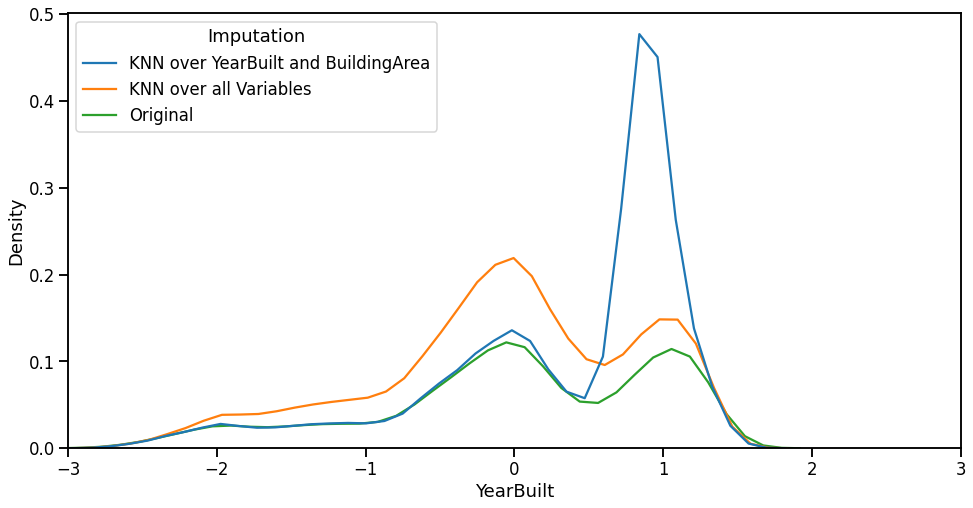

In [ ]:
mice_year_built = mice_df.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'

full_mice_year_built = complete_mice_df.YearBuilt.to_frame()
full_mice_year_built['Imputation'] = 'KNN over all Variables'

melb_year_built = scaled_df.YearBuilt.dropna().to_frame()
melb_year_built['Imputation'] = 'Original'

data = pandas.concat([mice_year_built, full_mice_year_built, melb_year_built])

fig = plt.figure(figsize=(16, 8))

#Se realiza un reindexado cuando se le entrega el imput

ax = seaborn.kdeplot(data=data.reset_index(), x='YearBuilt', hue='Imputation');
ax.set_xlim(-3, 3)
plt.show()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Mientras que muchos algoritmos (como*SVM*,*K-Nears más vecinos*y*regresión logística*) requieren que las características se normalicen, intuitivamente podemos pensar en*Análisis de componentes principales*(** PCA **) como un mejor Ejemplo de cuándo es importante la normalización.
En ** PCA ** estamos interesados en los componentes que maximizan la varianza.

In [ ]:
from sklearn.decomposition import PCA

n = 20

pca = PCA(n_components=n)

pca.fit(complete_mice_df)

pca.components_.shape

(20, 54)

In [ ]:
print('Explained variance ratio')

accum_var = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    accum_var += var
    print(f'Component {i + 1:2} | VarRatio {var:.3f} | Accum VarRatio {accum_var:.3f}')

Explained variance ratio
Component  1 | VarRatio 0.085 | Accum VarRatio 0.085
Component  2 | VarRatio 0.064 | Accum VarRatio 0.149
Component  3 | VarRatio 0.052 | Accum VarRatio 0.201
Component  4 | VarRatio 0.041 | Accum VarRatio 0.242
Component  5 | VarRatio 0.038 | Accum VarRatio 0.280
Component  6 | VarRatio 0.034 | Accum VarRatio 0.314
Component  7 | VarRatio 0.033 | Accum VarRatio 0.347
Component  8 | VarRatio 0.029 | Accum VarRatio 0.376
Component  9 | VarRatio 0.028 | Accum VarRatio 0.405
Component 10 | VarRatio 0.026 | Accum VarRatio 0.431
Component 11 | VarRatio 0.025 | Accum VarRatio 0.456
Component 12 | VarRatio 0.022 | Accum VarRatio 0.478
Component 13 | VarRatio 0.022 | Accum VarRatio 0.500
Component 14 | VarRatio 0.021 | Accum VarRatio 0.521
Component 15 | VarRatio 0.020 | Accum VarRatio 0.541
Component 16 | VarRatio 0.020 | Accum VarRatio 0.561
Component 17 | VarRatio 0.020 | Accum VarRatio 0.581
Component 18 | VarRatio 0.020 | Accum VarRatio 0.601
Component 19 | VarRat

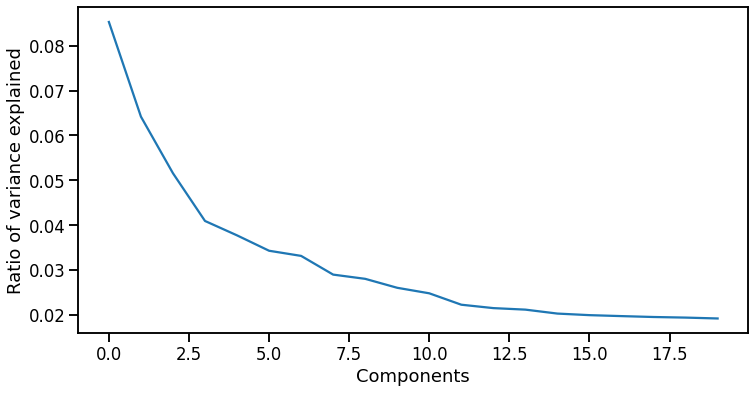

In [ ]:
fig = plt.figure(figsize=(12, 6))

seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_
                )

plt.xlabel('Components');
plt.ylabel('Ratio of variance explained');

A partir de este grafico podemos observar que el incremento de la proporción de varianza explicada acumulada, deja de ser sustancial a partir de 7. Por lo tanto seleccionamos es enúmero de componentes principales. 

REDUCCION DE DIMENSIONALIDAD CON PCA


In [ ]:
proyected_features = pca.transform(complete_mice_df)

proyected_features.shape

(9983, 20)

In [ ]:
# Copiamos nuestro dataset
pca_df = complete_mice_df.copy()

Vamos a almacenar los  n  componentes principales en nuestro dataset.

In [ ]:
pca_columns = ['pca{}'.format(i + 1) for i in range(pca.n_components)]

pca_df[pca_columns] = proyected_features

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# Copiamos nuestro dataset
df_final = pca_df.copy()

In [ ]:
df_final.shape

(9983, 74)

In [ ]:
df_final

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,...,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,1.255007,0.701803,-1.968224,-0.082866,0.125710,-0.722081,0.146116,2.058258,0.236849,0.870115
1,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.945343,0.556570,-1.993120,0.126203,0.200024,-0.715209,0.120130,2.059702,0.246417,0.884595
2,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,1.413111,0.529778,-1.723148,-0.181803,0.128543,-0.709541,0.094533,2.043496,0.235290,0.844112
3,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.962901,0.318025,-1.720998,0.049147,0.243290,-0.683835,0.097208,2.073677,0.239265,0.835770
4,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.962115,0.450904,-1.894036,0.109846,0.239672,-0.720473,0.124908,2.095722,0.254470,0.879111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,-1.252847,1.554132,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.358934,0.102579,-0.131339,1.860017,1.415001,-0.961332,-0.957554,1.896682,-0.387755,0.199065
9979,0.798182,-0.643446,-0.326558,-0.693338,1.731010,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,0.438399,-0.034886,0.350976,1.525998,1.170053,-0.691081,-0.771835,1.856042,-0.417782,-0.009112
9980,-1.252847,1.554132,-0.326558,-0.693338,-0.577697,1.600085,-0.339734,-0.179615,-0.066536,-0.0511,...,-0.818985,-0.161889,0.833118,-0.245915,-0.702002,-0.690834,-0.977209,0.246820,2.440684,-1.262141
9981,0.798182,-0.643446,-0.326558,1.442298,-0.577697,-0.624967,-0.339734,-0.179615,-0.066536,-0.0511,...,-1.575223,-0.571670,1.468153,-1.559355,1.982879,1.895943,-0.726919,3.035681,0.388431,0.787687


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
